# Lando Norris
<img src="https://www.formula1.com/content/fom-website/en/drivers/lando-norris/_jcr_content/image.img.1920.medium.jpg/1646819013197.jpg" width="300">

### Team: McLaren

<img src ="https://www.formula1.com/content/fom-website/en/drivers/lando-norris/_jcr_content/helmet.img.png/1646824749193.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

nor_laps <- lap_data %>%
            filter(driverId == 846)

# Season Analysis

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1046,87
1011,57
1045,57
1052,56


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5141847,85.69745,1.428291


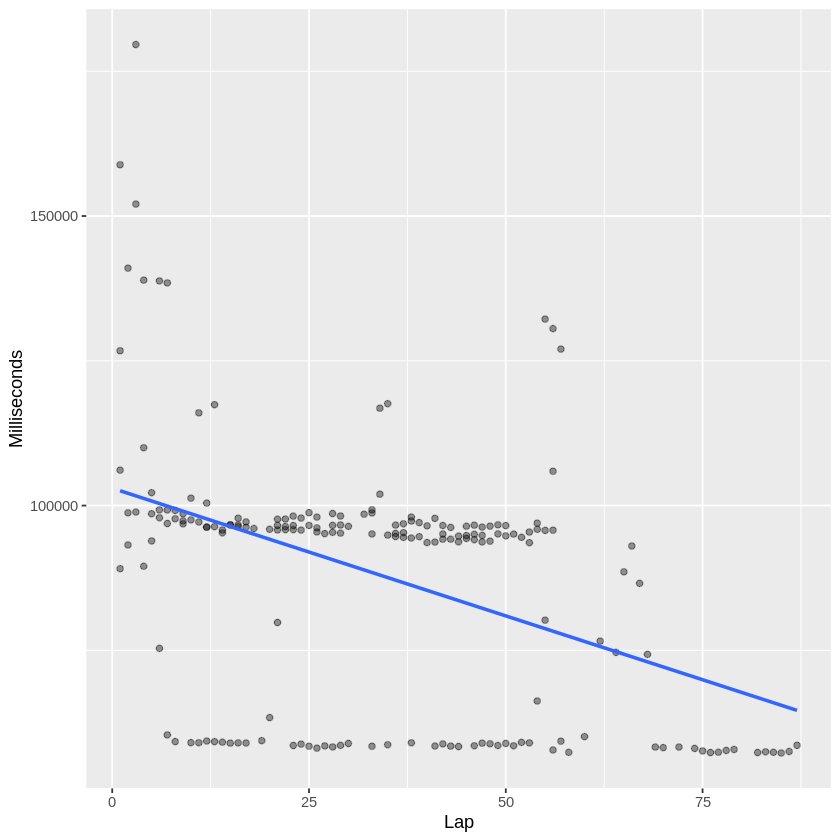

In [4]:
#1. Bahrain

ln_bahrain <- nor_laps %>%
                filter(raceId %in% bahrain_race_ID) 

ln_bahrain_clean <- ln_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ln_bahrain_clean
ln_bahrain_clean_ID <- ln_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_bahrain_races <- nor_laps %>%
                    filter(raceId %in% ln_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1072,50


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5286527,88.10878,1.46848


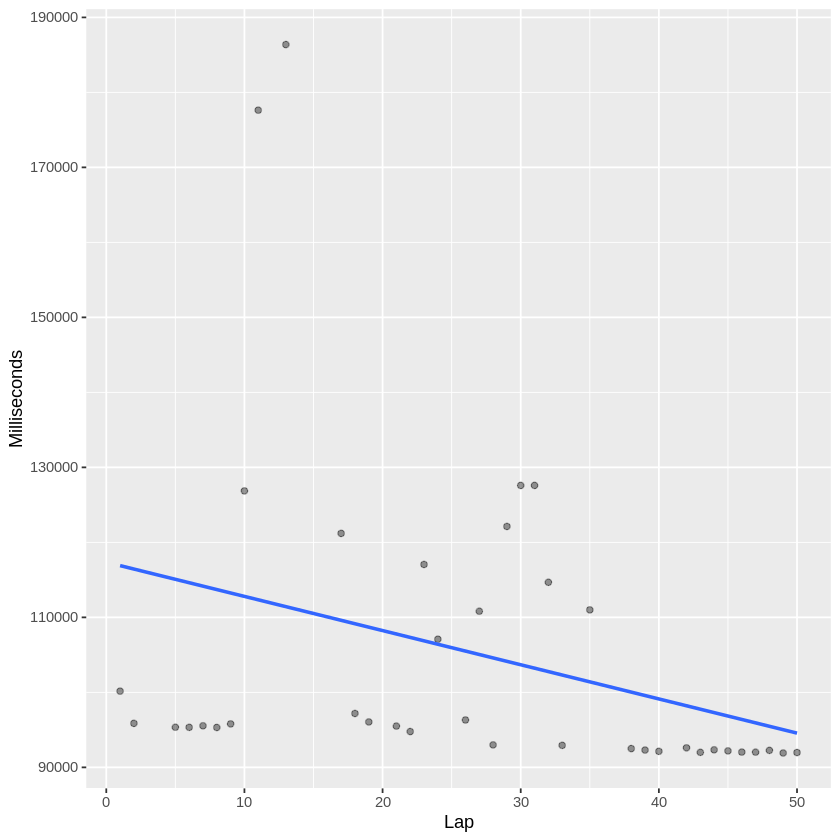

In [5]:
#2.  Saudi Arabia

ln_saudi <- nor_laps %>%
                filter(raceId %in% saudi_race_ID) 

ln_saudi_clean <- ln_saudi %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_saudi_clean
ln_saudi_clean_ID <- ln_saudi_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_saudi_races <- nor_laps %>%
                    filter(raceId %in% ln_saudi_clean_ID)

formulaone_split <- initial_split(ln_saudi_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_sa_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1010,57


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5267514,87.7919,1.463198


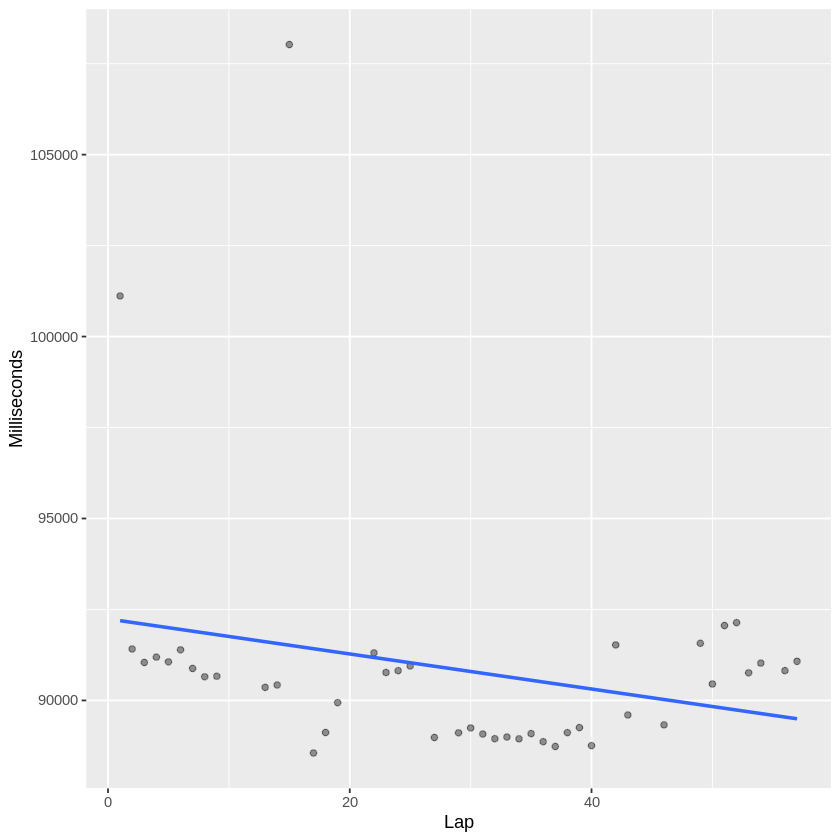

In [6]:
#3.  Australia

ln_aus <- nor_laps %>%
                filter(raceId %in% aus_race_ID) 

ln_aus_clean <- ln_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_aus_clean
ln_aus_clean_ID <- ln_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_aus_races <- nor_laps %>%
                    filter(raceId %in% ln_aus_clean_ID)

formulaone_split <- initial_split(ln_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,63
1053,63


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5556074,92.60124,1.543354


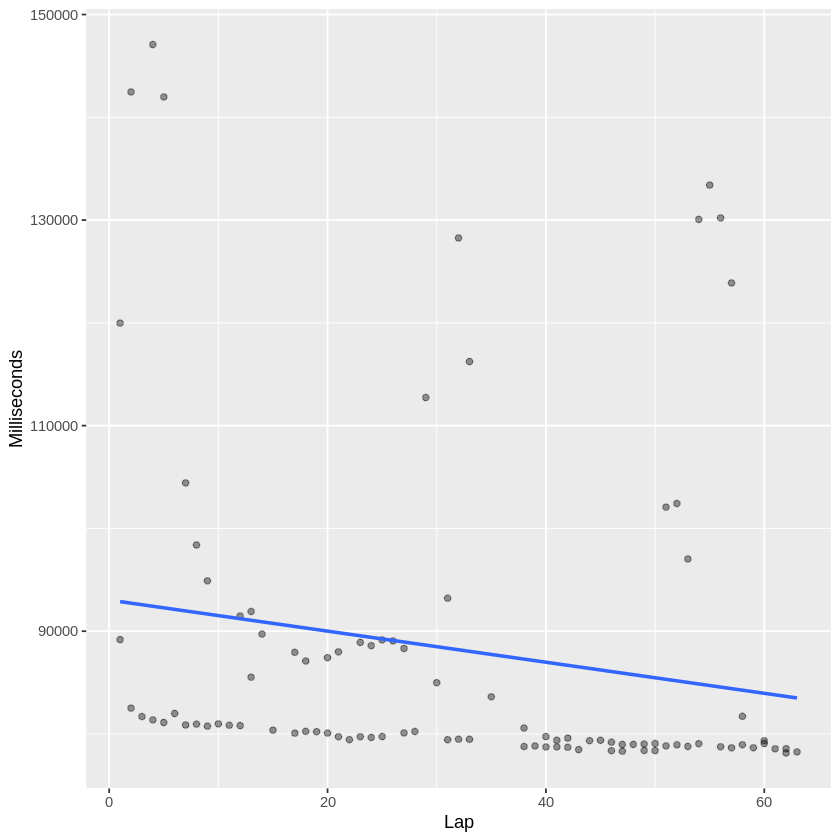

In [7]:
#4.  Italy, Imola

ln_imola <- nor_laps %>%
                filter(raceId %in% imola_race_ID) 

ln_imola_clean <- ln_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_imola_clean
ln_imola_clean_ID <- ln_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_imola_races <- nor_laps %>%
                    filter(raceId %in% ln_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1044,58
1067,58


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5741632,95.69386,1.594898


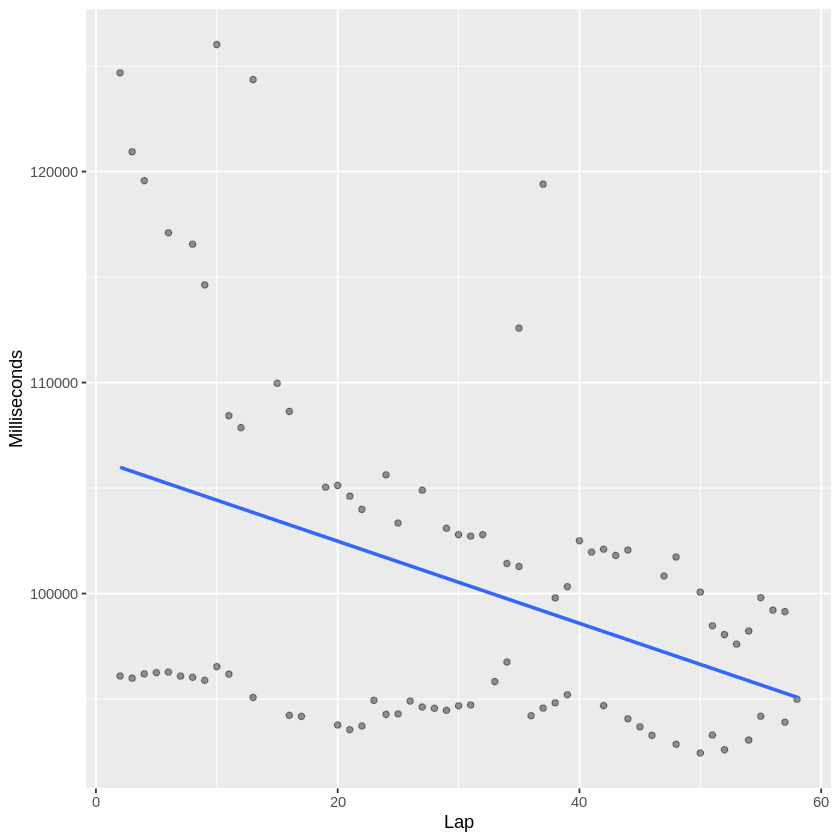

In [8]:
#5.  Turkey (Replacing Miami)

ln_turkey <- nor_laps %>%
                filter(raceId %in% turkey_race_ID) 

ln_turkey_clean <- ln_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_turkey_clean
ln_turkey_clean_ID <- ln_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_turkey_races <- nor_laps %>%
                    filter(raceId %in% ln_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1036,65
1055,65
1014,44


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5632390,93.87317,1.564553


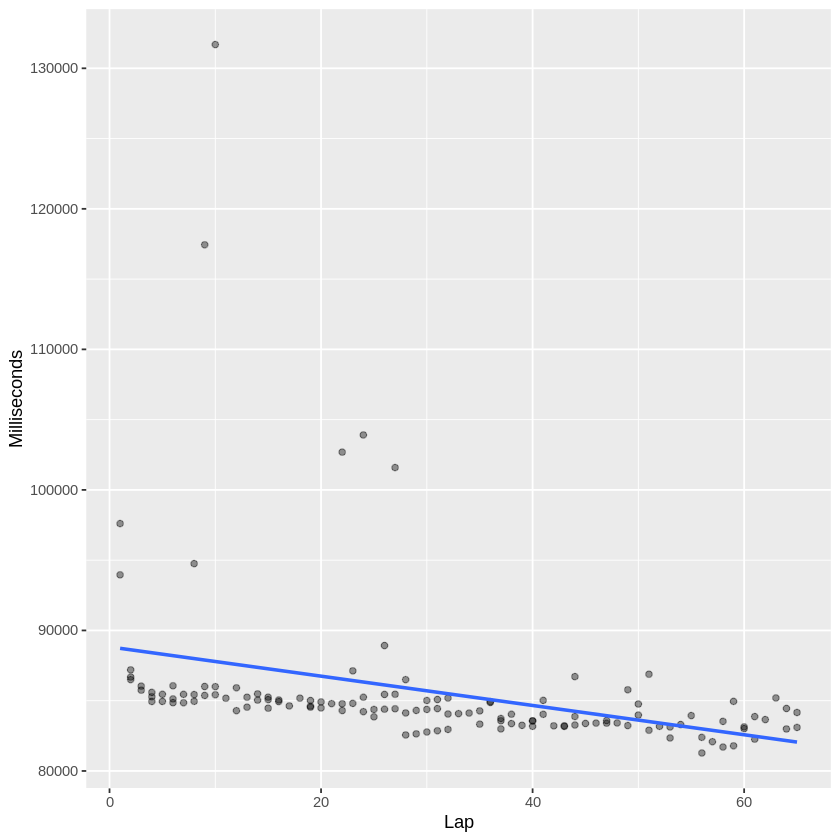

In [9]:
#6.  Spain

ln_spain <- nor_laps %>%
                filter(raceId %in% spain_race_ID) 

ln_spain_clean <- ln_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_spain_clean
ln_spain_clean_ID <- ln_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_spain_races <- nor_laps %>%
                    filter(raceId %in% ln_spain_clean_ID)

formulaone_split <- initial_split(ln_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1015,78
1056,78


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6131095,102.1849,1.703082


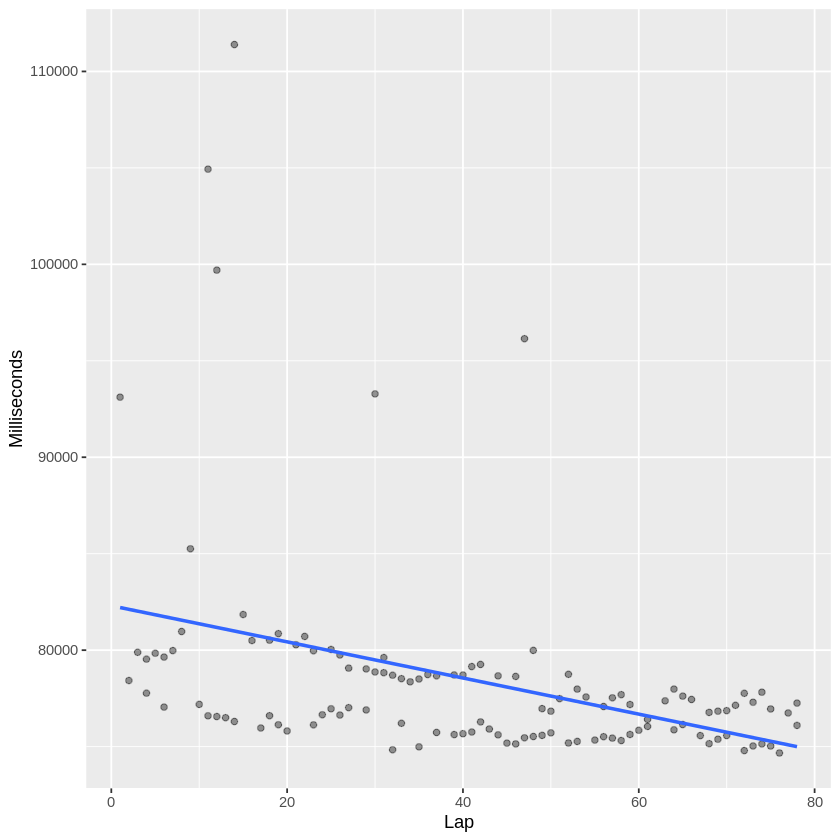

In [10]:
#7.   Monaco

ln_monaco <- nor_laps %>%
                filter(raceId %in% monaco_race_ID) 

ln_monaco_clean <- ln_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_monaco_clean
ln_monaco_clean_ID <- ln_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_monaco_races <- nor_laps %>%
                    filter(raceId %in% ln_monaco_clean_ID)

formulaone_split <- initial_split(ln_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1013,51
1057,51


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5788146,96.4691,1.607818


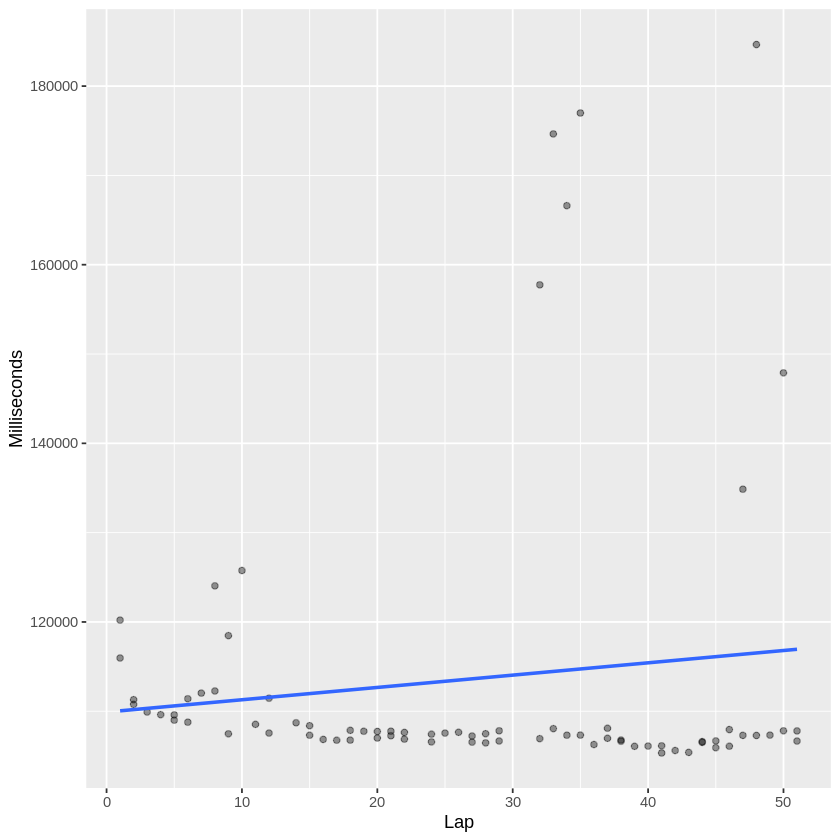

In [11]:
#8.  Azerbaijan

ln_azerbaijan <- nor_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

ln_azerbaijan_clean <- ln_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_azerbaijan_clean
ln_azerbaijan_clean_ID <- ln_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_azerbaijan_races <- nor_laps %>%
                    filter(raceId %in% ln_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1016,8


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 0 breaks instead.”
Warning message:
“Too little data to stratify. Unstratified resampling will be used.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
3408777,56.81296,0.9468826


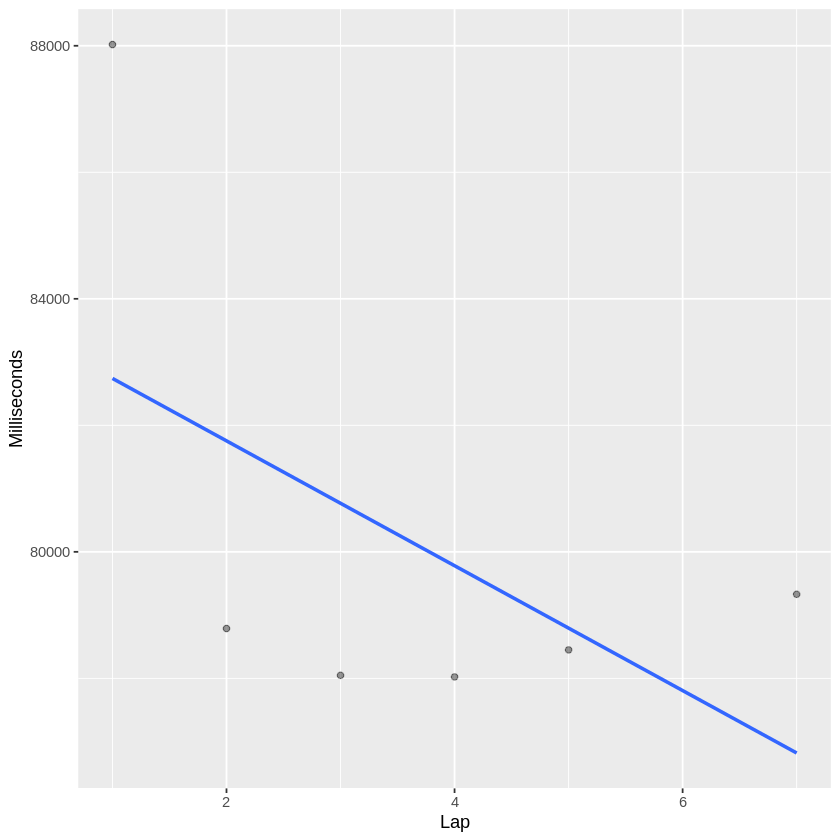

In [12]:
#9.  Canada

# ln_canada <- nor_laps %>%
#                 filter(raceId %in% canada_race_ID) 

# ln_canada_clean <- ln_canada %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# ln_canada_clean
# ln_canada_clean_ID <- ln_canada_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# ln_canada_races <- nor_laps %>%
#                     filter(raceId %in% ln_canada_clean_ID)

# formulaone_split <- initial_split(ln_canada_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

# ### GETS PREDICTION

# get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5676921,94.61536,1.576923


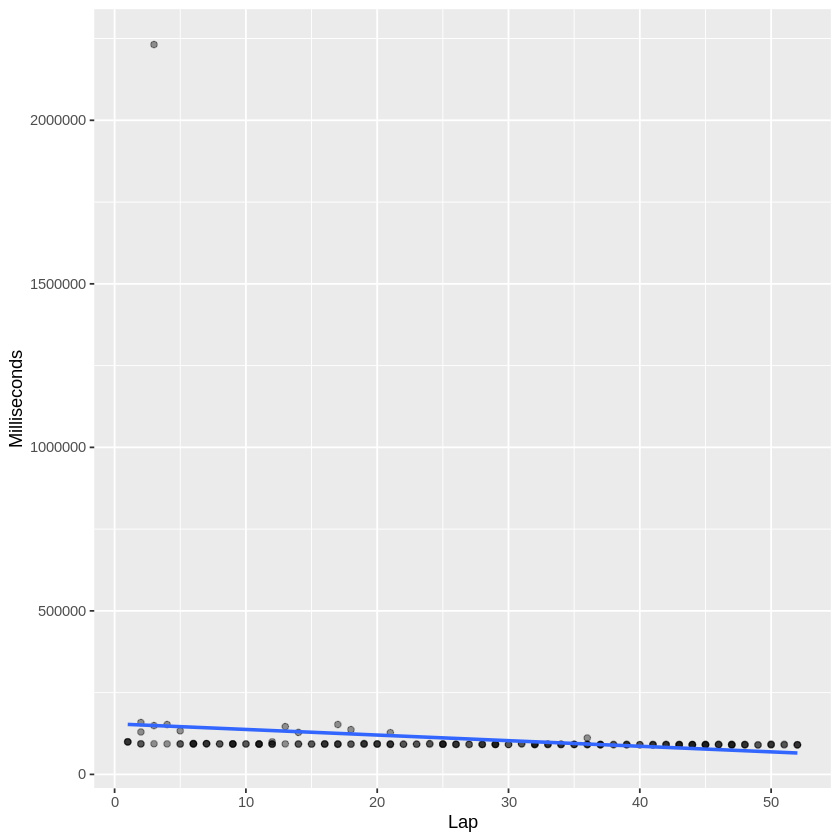

In [13]:
#10.  Great Britain

ln_uk <- nor_laps %>%
                filter(raceId %in% uk_race_ID) 

ln_uk_clean <- ln_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_uk_clean_ID <- ln_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_uk_races <- nor_laps %>%
                    filter(raceId %in% ln_uk_clean_ID)

formulaone_split <- initial_split(ln_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5145862,85.76436,1.429406


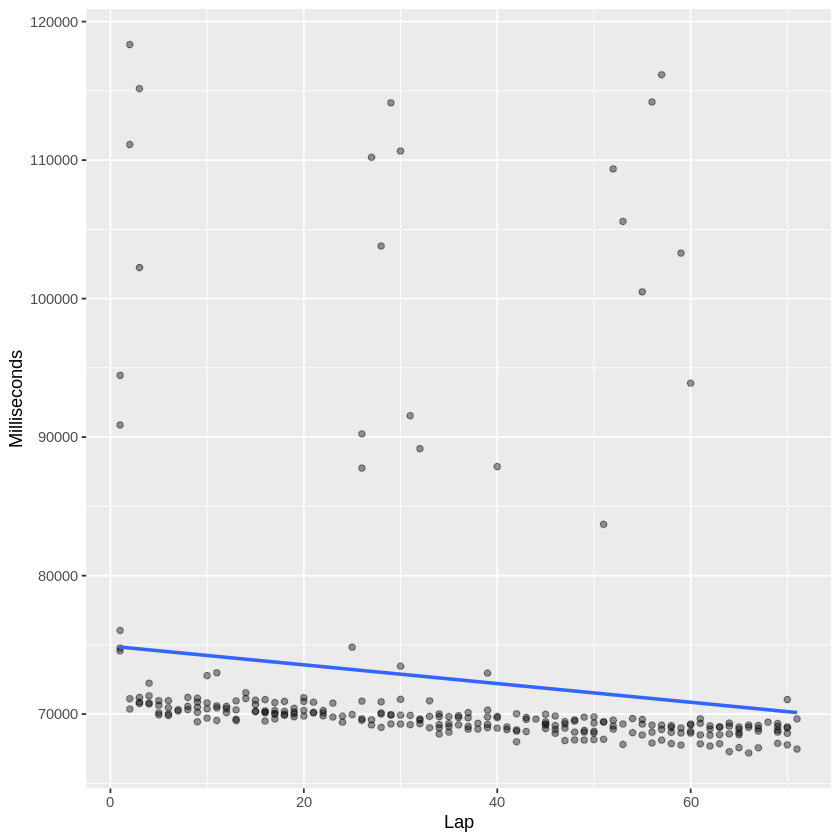

In [14]:
#11.  Austria

ln_austria <- nor_laps %>%
                filter(raceId %in% austria_race_ID) 

ln_austria_clean <- ln_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_austria_clean_ID <- ln_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_austria_races <- nor_laps %>%
                    filter(raceId %in% ln_austria_clean_ID)

formulaone_split <- initial_split(ln_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austria_prediction()

In [15]:
# #12. France

# ln_france <- nor_laps %>%
#                 filter(raceId %in% france_race_ID) 

# ln_france_clean <- ln_france %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# ln_france_clean
# ln_france_clean_ID <- ln_france_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# ln_france_races <- nor_laps %>%
#                     filter(raceId %in% ln_france_clean_ID)

# formulaone_split <- initial_split(ln_france_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

# ### GETS PREDICTION

# get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5870762,97.84604,1.630767


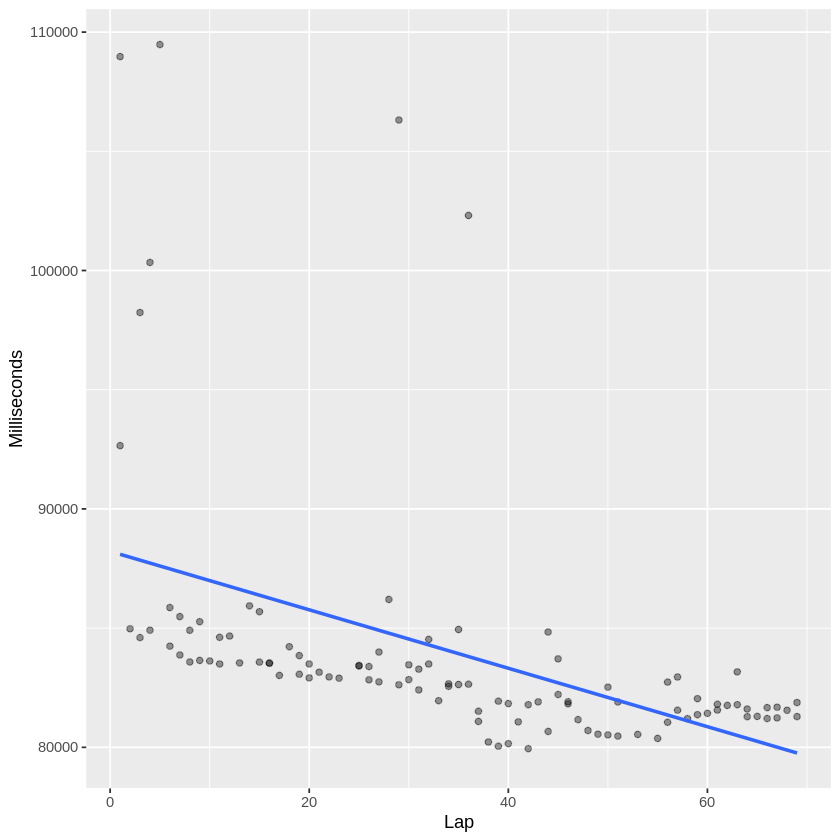

In [16]:
#13.  Hungary

ln_hungary <- nor_laps %>%
                filter(raceId %in% hungary_race_ID) 

ln_hungary_clean <- ln_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

ln_hungary_clean_ID <- ln_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_hungary_races <- nor_laps %>%
                    filter(raceId %in% ln_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(ln_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1037,44
1022,43
1063,1


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5184888,86.4148,1.440247


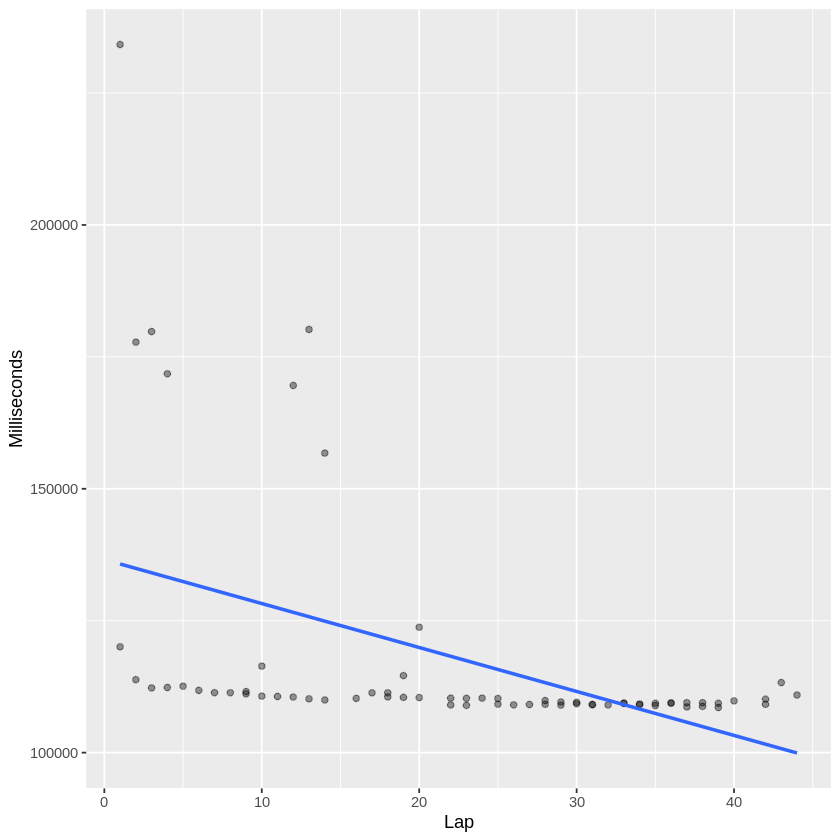

In [17]:
#14.  Belgium

ln_belgium <- nor_laps %>%
                filter(raceId %in% belgium_race_ID) 

ln_belgium_clean <- ln_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_belgium_clean
ln_belgium_clean_ID <- ln_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_belgium_races <- nor_laps %>%
                    filter(raceId %in% ln_belgium_clean_ID)

formulaone_split <- initial_split(ln_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,71


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5513916,91.89861,1.531643


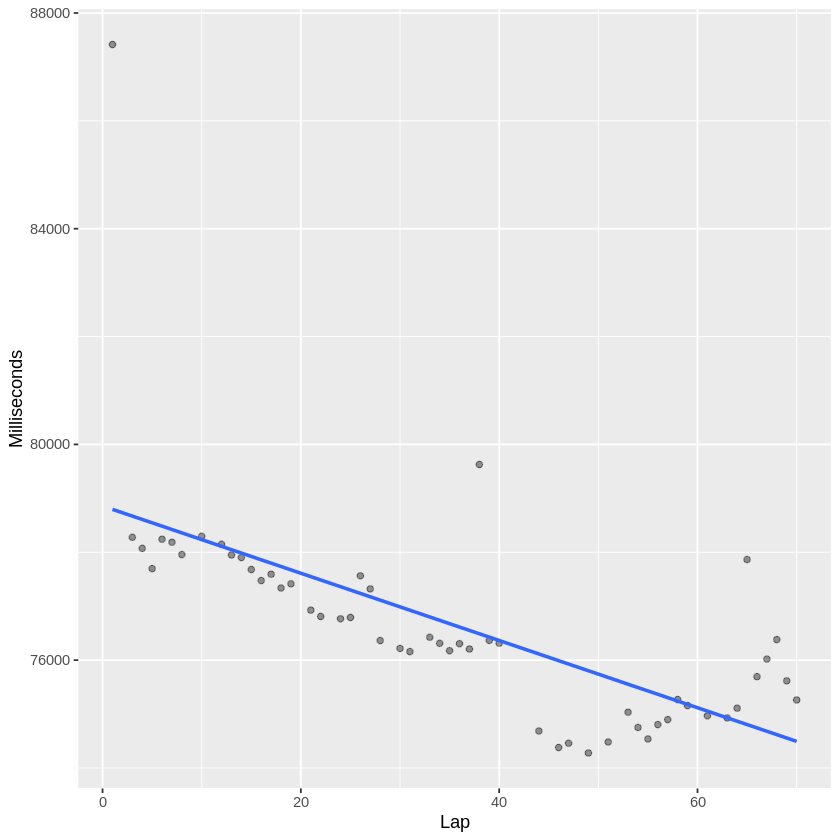

In [18]:
#15.  Netherlands

ln_netherlands <- nor_laps %>%
                filter(raceId %in% netherlands_race_ID) 

ln_netherlands_clean <- ln_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_netherlands_clean
ln_netherlands_clean_ID <- ln_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_netherlands_races <- nor_laps %>%
                    filter(raceId %in% ln_netherlands_clean_ID)

formulaone_split <- initial_split(ln_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1038,53
1065,53
1023,52


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4785603,79.76005,1.329334


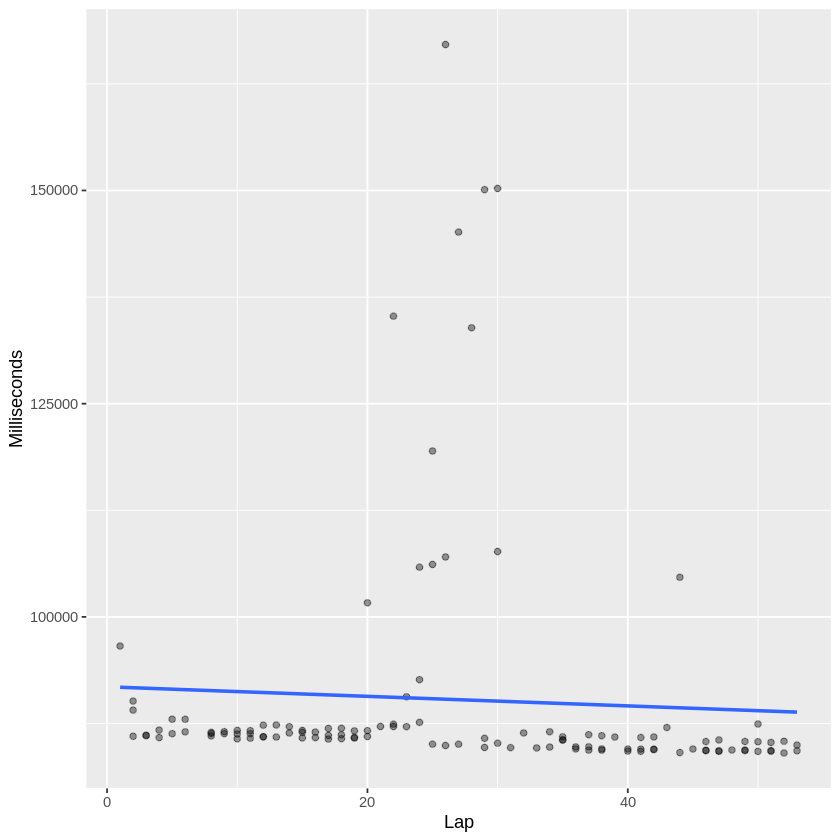

In [19]:
#16.  Italy, Monza

ln_monza <- nor_laps %>%
                filter(raceId %in% monza_race_ID) 

ln_monza_clean <- ln_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ln_monza_clean
ln_monza_clean_ID <- ln_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_monza_races <- nor_laps %>%
                    filter(raceId %in% ln_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
7205174,120.0862,2.001437


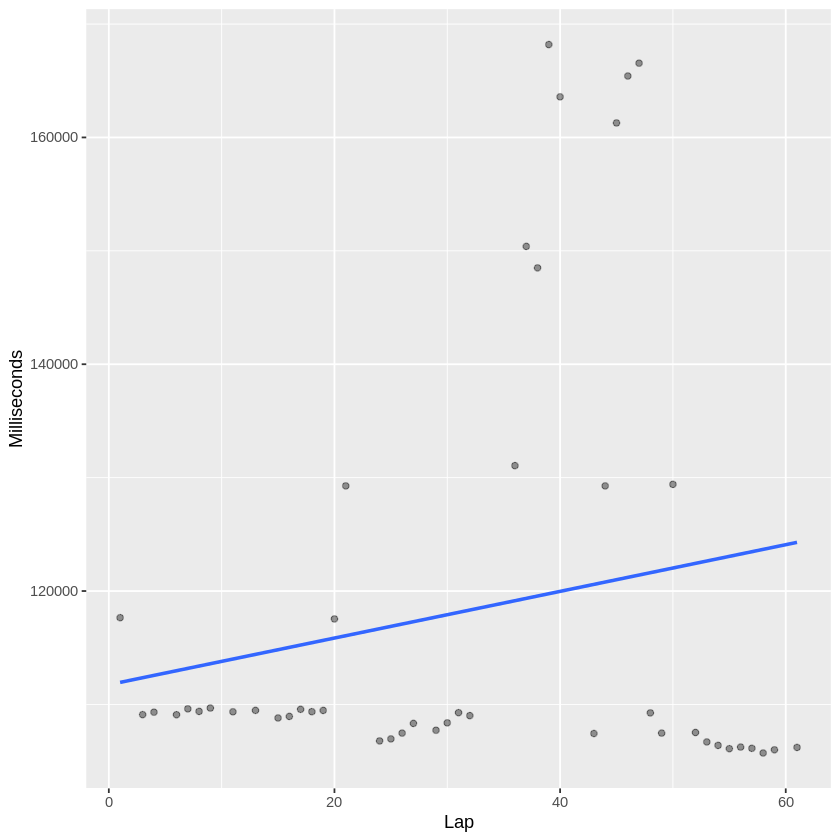

In [20]:
#17.  Singapore

ln_singapore <- nor_laps %>%
                filter(raceId %in% singapore_race_ID) 

ln_singapore_clean <- ln_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_singapore_clean_ID <- ln_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_singapore_races <- nor_laps %>%
                    filter(raceId %in% ln_singapore_clean_ID)

formulaone_split <- initial_split(ln_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5150316,85.8386,1.430643


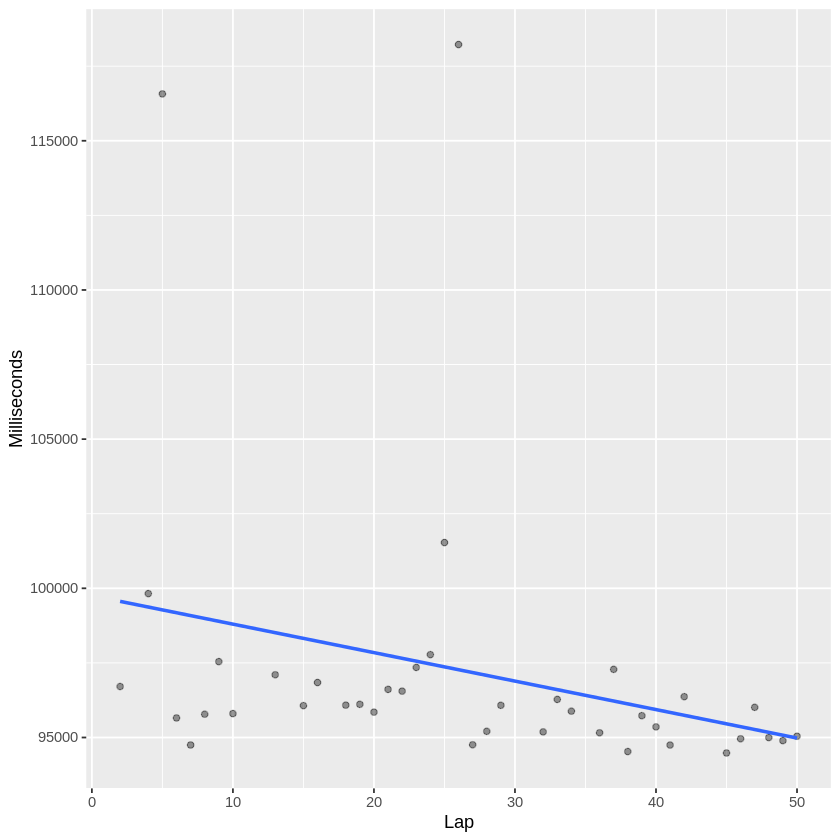

In [21]:
#18.  Japan

ln_japan <- nor_laps %>%
                filter(raceId %in% japan_race_ID) 

ln_japan_clean <- ln_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_japan_clean_ID <- ln_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_japan_races <- nor_laps %>%
                    filter(raceId %in% ln_japan_clean_ID)

formulaone_split <- initial_split(ln_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5751018,95.8503,1.597505


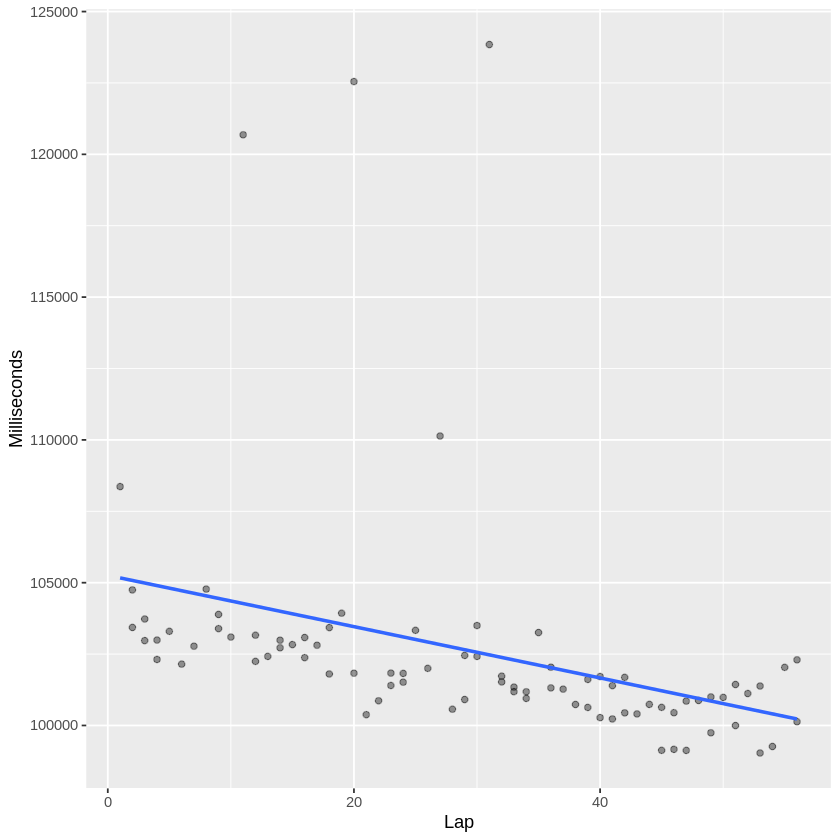

In [22]:
#19.  USA, Austin

ln_austin <- nor_laps %>%
                filter(raceId %in% austin_race_ID) 

ln_austin_clean <- ln_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_austin_clean_ID <- ln_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_austin_races <- nor_laps %>%
                    filter(raceId %in% ln_austin_clean_ID)

formulaone_split <- initial_split(ln_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5949593,99.15988,1.652665


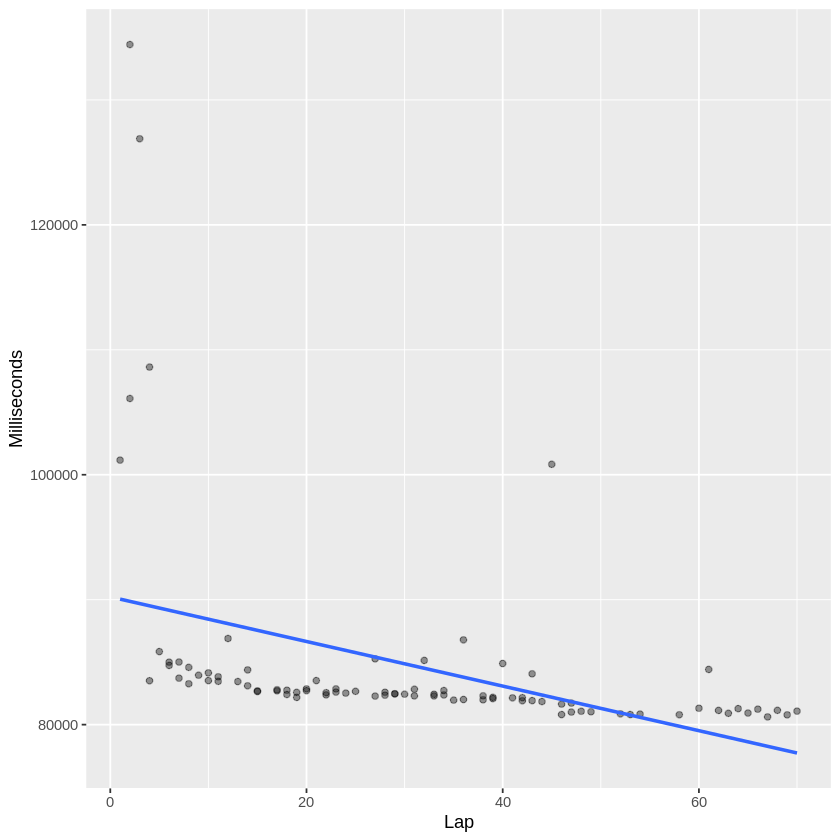

In [23]:
#20.  Mexico

ln_mexico <- nor_laps %>%
                filter(raceId %in% mexico_race_ID) 

ln_mexico_clean <- ln_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_mexico_clean_ID <- ln_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_mexico_races <- nor_laps %>%
                    filter(raceId %in% ln_mexico_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ln_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5601691,93.36151,1.556025


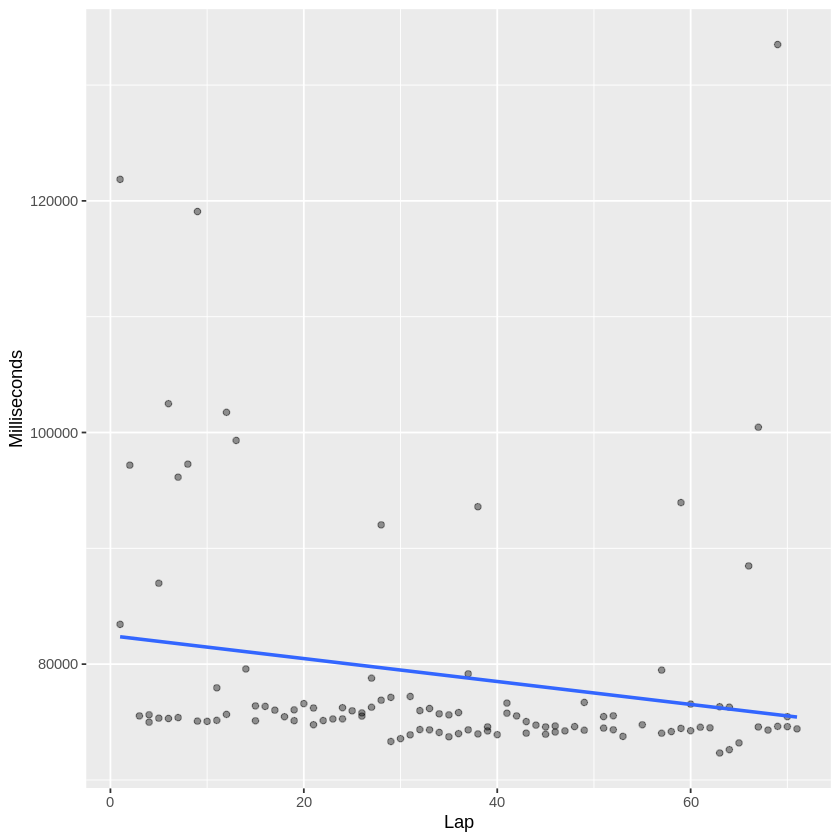

In [24]:
#21.  Brazil

ln_brazil <- nor_laps %>%
                filter(raceId %in% brazil_race_ID) 

ln_brazil_clean <- ln_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

ln_brazil_clean_ID <- ln_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_brazil_races <- nor_laps %>%
                    filter(raceId %in% ln_brazil_clean_ID)

formulaone_split <- initial_split(ln_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1073,58
1047,55
1030,54


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5880504,98.0084,1.633473


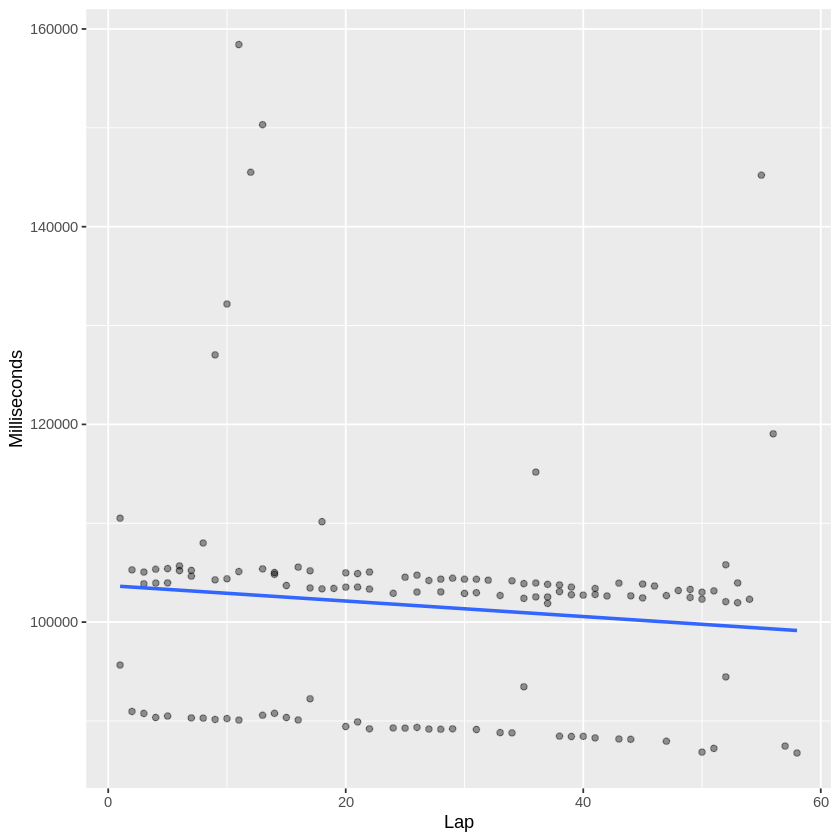

In [25]:
#22.  Abu Dhabi

ln_uae <- nor_laps %>%
                filter(raceId %in% uae_race_ID) 

ln_uae_clean <- ln_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ln_uae_clean
ln_uae_clean_ID <- ln_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

ln_uae_races <- nor_laps %>%
                    filter(raceId %in% ln_uae_clean_ID)

formulaone_split <- initial_split(ln_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uae_prediction()